# Project Topic
To receive full credit for this section, the learner should address the two questions below:
- Is there a clear explanation of what this project is about? 
- Does it give a clear description of generative deep learning models including Generative Adversarial Networks (GANs)?


This project is about generating Lo-fi (low fidelity) music via deep learning. Specifically via LTSM (Long Term, Short Memory) Recurrent Neural Networks. Lo-fi tends to be a genre that has imperfections and raw sounds, often characterized by a relaxed, ambient, and jazzy vibe.

I used this excellent research paper as a reference https://people.idsia.ch/~juergen/blues/IDSIA-07-02.pdf which goes over musical compositions using LTSM RNNs.


# Data 
- Is there a clear description of the data, including the size, dimension, and structure? Some ideas for image data: you can include how many samples, number of channels (color or gray or more?) or modalities, image file format, whether images have the same dimension or not, etc.






The data we'll be using to generate our music are MIDI files. A MIDI file is a type of digital file used for storing music performance data. "MIDI" stands for Musical Instrument Digital Interface. It is a standardized format for communicating between musical devices like keyboards, synthesizers, or computers. Instead of containing actual sound recordings, MIDI files store instructions, like which notes to play, their timing, duration, and dynamics, as well as information about instrument types.

External package requirements:
- ffmpeg
- fluidsynth

In [15]:
import glob
import os

import IPython
import keras
import librosa
import matplotlib.pyplot as plt
import midi2audio
import numpy as np
import pandas as pd
import pretty_midi
import tensorflow as tf
from pydub import AudioSegment

# Using GPU to do training.
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
DATA_DIR = "data/"
EXPORT_DIR = "export/"

In [4]:
# Get all MIDI file paths and check how many there are
midi_paths = glob.glob(f"{DATA_DIR}*.mid")
df_midi = pd.DataFrame(midi_paths, columns=["file_path"])
df_midi.describe()

,file_path
count,23
unique,23
top,data/Cymatics - Lofi MIDI 1 - C Maj.mid
freq,1


Let's analyze how many instruments are in our MIDI files.

In [5]:
num_instruments = []
for file_path in df_midi["file_path"]:
    midi_file = pretty_midi.PrettyMIDI(file_path)
    num_instruments.append(len(midi_file.instruments))

df_midi["num_instruments"] = num_instruments
df_midi.describe()

,num_instruments
count,23.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


They're all one, which is fine, we can generate something from this. Let's hear some samples of what the sound like. 

In [ ]:
fs = midi2audio.FluidSynth(sound_font="default.sf2", sample_rate=22050)
def convert_midi_to_wav(midi_file_path, dest_file_path = ""):
    """
    Convert a MIDI file to wav

    :param midi_file_path: File path of the midi file.
    :param dest_file_path: Path of the destination file. Don't include the file type
    :return: wav file path name
    """
    if dest_file_path == "":
        dest_file_path = f"{EXPORT_DIR}wav/{os.path.splitext(os.path.basename(midi_file_path))[0]}"

    export_file_path_wav = f"{dest_file_path}.wav"
    # Don't waste compute time on existing files
    if os.path.exists(export_file_path_wav):
        print("File exists.")
    else:
        # Converting MIDI to .wav.
        fs.midi_to_audio(midi_file_path, export_file_path_wav)
    return export_file_path_wav

In [9]:
wav_paths = []
for file_path in df_midi["file_path"]:
    wav_paths.append(convert_midi_to_wav(file_path))
df_midi["wav_paths"] = wav_paths

FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'export/wav/Cymatics - Lofi MIDI 1 - C Maj.wav'..
FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'export/wav/Cymatics - Lofi MIDI 10 - D Maj.wav'..
FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'export/wav/Cymatics - Lofi MIDI 11 - E Maj.wav'..
FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'exp

In [10]:
df_midi["wav_paths"].head()

0     export/wav/Cymatics - Lofi MIDI 1 - C Maj.wav
1    export/wav/Cymatics - Lofi MIDI 10 - D Maj.wav
2    export/wav/Cymatics - Lofi MIDI 11 - E Maj.wav
3    export/wav/Cymatics - Lofi MIDI 12 - E Min.wav
4    export/wav/Cymatics - Lofi MIDI 13 - E Min.wav
Name: wav_paths, dtype: object

In [11]:
IPython.display.Audio(df_midi["wav_paths"][0])

In [ ]:
IPython.display.Audio(df_midi["wav_paths"][10])

# Exploratory Data Analysis 
- EDA on images is open-ended, and it can be as simple as picking a few samples of images from each class, displaying them, and describing any findings. Some more ideas: you could plot histograms of those sample images and draw any conclusions. You could summarize image similarity by choosing a single metric to compare. The data may or may not have different image sizes, but you could mention that if the image sizes are different. Also, you can check how the range of the pixel intensities is distributed. You may also count labels (if multi-class or multi-label classification problem) to see if the labels are skewed, or you can plot a histogram of areas by segmentation labels, etc.
10 pts
- EDA goes above and beyond expectations: for example, in addition to picking a few sample images from each class, displaying them, and describing any findings, the learner includes several other histograms, appropriate visualizations, and detailed analysis of the dataset.





# Visualization

- Waveform
    - Displays amplitude over time
- Spectrogram
    - Display a frequency-based over time
- Mel Spectrogram
    - Display human perception of frequency based on the mel scale
- Chromagram
    - Displays intensity of pitch over time (harmony and melody)

In [17]:
def display_waveform(file_path):
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def display_spectrogram(file_path):
    y, sr = librosa.load(file_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

def display_mel_spectrogram(file_path):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

def display_chromagram(file_path):
    y, sr = librosa.load(file_path)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', cmap='coolwarm')
    plt.colorbar()
    plt.title('Chromagram')
    plt.show()

def display_all_graphs(file_path):
    display_waveform(file_path)
    display_spectrogram(file_path)
    display_mel_spectrogram(file_path)
    display_chromagram(file_path)

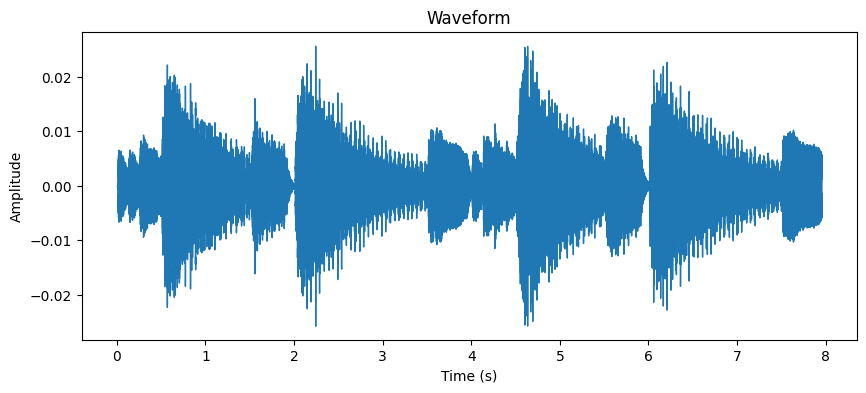

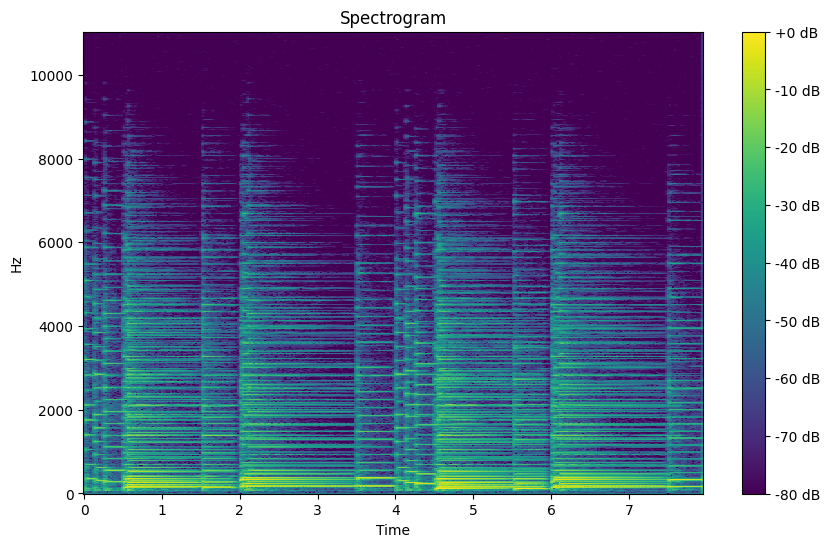

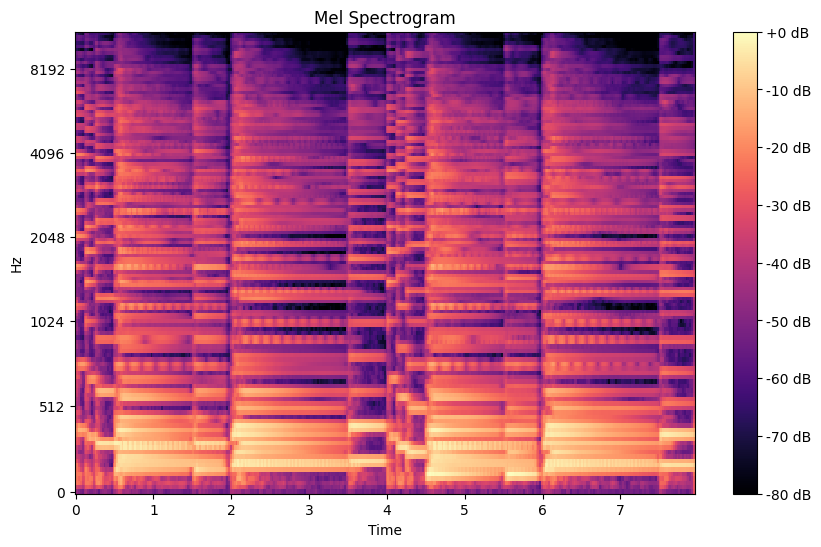

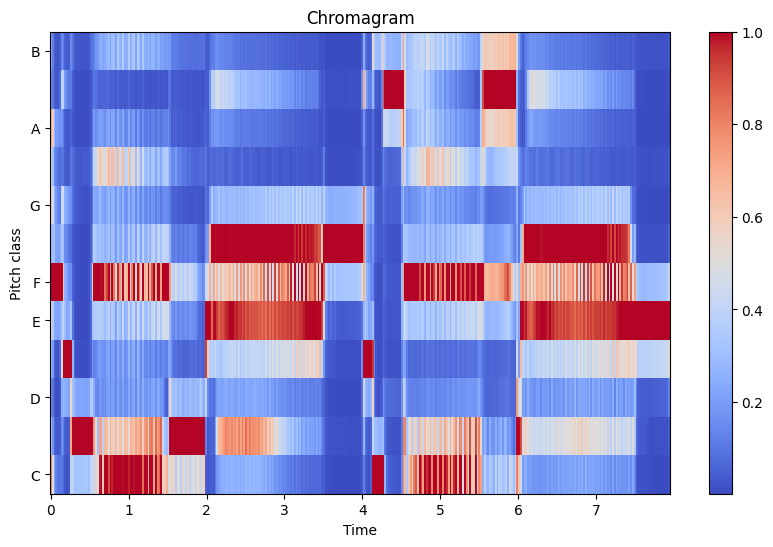

In [16]:
display_all_graphs(df_midi["wav_paths"][0])


# Model Architecture
- Does it describe the model architecture and explain why the learner believes a specific architecture/loss function is suitable for the problem? 
- Did the learner tune the hyperparameters? 
- Did the learner compare multiple architectures/loss functions?
- Note, when you evaluate, don't just base your score on the complexity of the model/technique or performance of the model alone. Base your score on how the learner demonstrates understanding by explaining the concepts and why they chose particular methods/techniques.



The model architecture I chose was Long Short-Term Memory Recurrent Neural Networks or LSTM RNNs for short. They are a type of deep learning model designed to process and analyze sequential data. Unlike traditional RNNs (Recurrent Neural Networks), LSTMs excel at handling long-term dependencies in sequences. This is achieved by their unique structure, which includes specialized components—called gates—that regulate the flow of information and selectively remember or forget parts of the input data. This design addresses the problem of vanishing gradients in traditional RNNs, allowing LSTMs to better retain and utilize relevant information over longer sequences.

How they can be used to generate music:
LSTM RNNs can be applied to music generation by learning patterns and structures within existing musical compositions. Here's an overview of how this works:

Training Phase: The LSTM is fed sequences of notes or musical data (e.g., MIDI files) and trained to predict the next note or sequence based on the given input. It learns musical structures, harmonies, rhythms, and dynamics over time.

Generation Phase: Once trained, the LSTM can generate new music by providing it with a starting sequence, or "seed." The model predicts subsequent notes or musical elements, creating an original composition while maintaining coherence and flow.

Applications: LSTM-generated music can be used in various creative contexts—video game soundtracks, background music for films, personalized compositions, or even experimental genres.


# Results and Analysis 
- Does it include results in the form of tables, figures, etc.? 
- Analysis 
- Does it include analysis of results:
- the reasoning of why something worked well or why it didn't work
- description of troubleshooting steps.
- a hyperparameter optimization procedure summary.


# Conclusion 
Does the conclusion include the following:
- Basic reiteration of results
- Discussion of learning and takeaways
- Discussion of why something didn’t work.
- Suggestions for ways to improve.